In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [3]:
stock = "MSFT"

In [4]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

In [5]:
df = yf.download(stock, start, end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-18,44.650002,44.840000,44.250000,44.689999,38.042065,43407500
2014-07-21,44.560001,45.160000,44.220001,44.840000,38.169754,37604400
2014-07-22,45.000000,45.150002,44.590000,44.830002,38.161247,43095800
2014-07-23,45.450001,45.450001,44.619999,44.869999,38.195286,52362900
2014-07-24,44.930000,45.000000,44.320000,44.400002,37.795204,30725300
...,...,...,...,...,...,...
2024-07-12,454.329987,456.359985,450.649994,453.549988,453.549988,16311300
2024-07-15,453.299988,457.260010,451.429993,453.959991,453.959991,14429400
2024-07-16,454.220001,454.299988,446.660004,449.519989,449.519989,17175700


<Axes: xlabel='Date', ylabel='Close'>

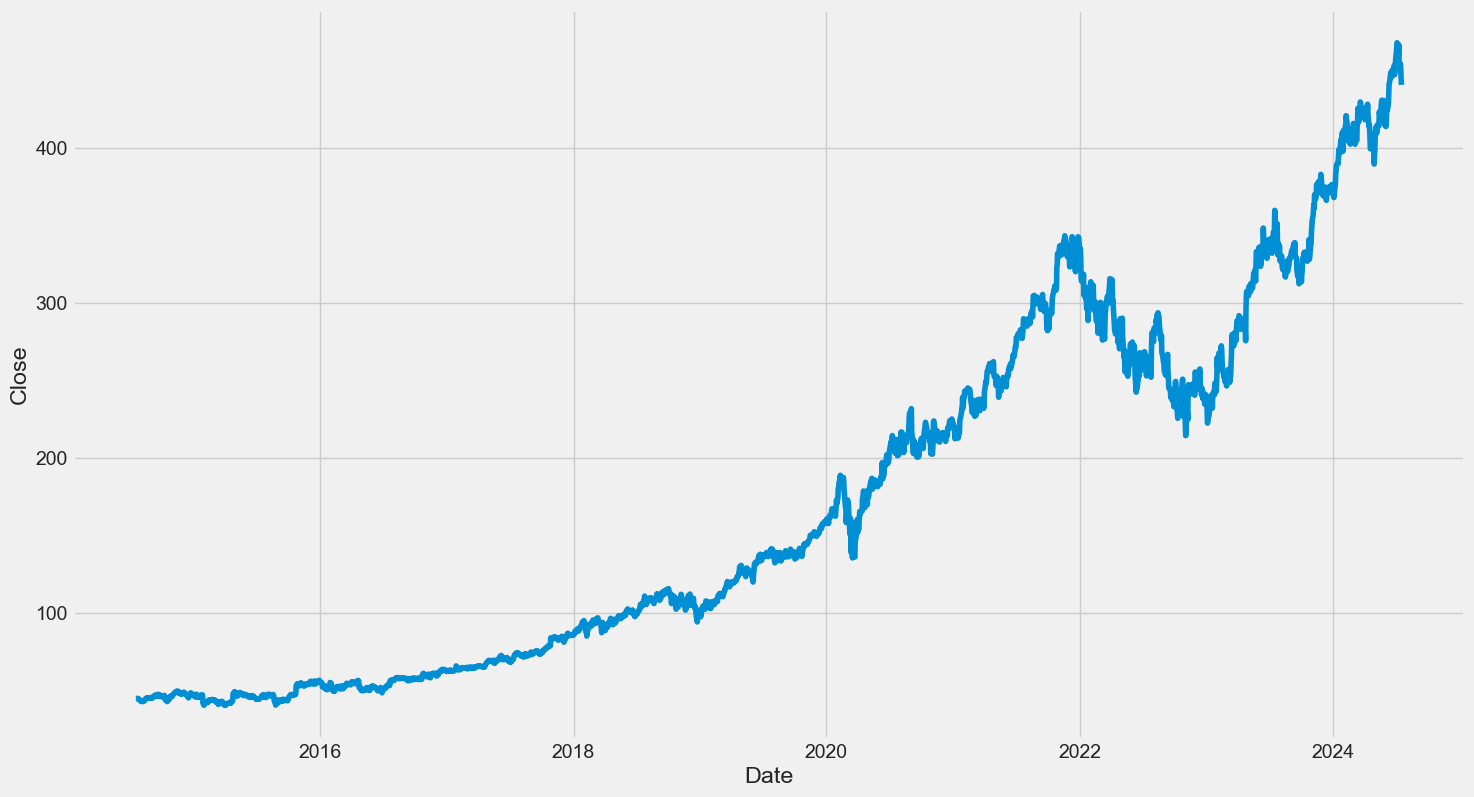

In [6]:
plt.figure(figsize=(16,9))
sns.lineplot(x="Date", y="Close", data=df)

In [7]:
data = df.filter(['Close'])
data

,Close
Date,
2014-07-18,44.689999
2014-07-21,44.840000
2014-07-22,44.830002
2014-07-23,44.869999
2014-07-24,44.400002
...,...
2024-07-12,453.549988
2024-07-15,453.959991
2024-07-16,449.519989


In [8]:
# replace Close with the count of days
data["Close"] = range(1, len(data) + 1)
data

,Close
Date,
2014-07-18,1
2014-07-21,2
2014-07-22,3
2014-07-23,4
2014-07-24,5
...,...
2024-07-12,2513
2024-07-15,2514
2024-07-16,2515


In [9]:
dataset = data.values
dataset

array([[   1],
       [   2],
       [   3],
       ...,
       [2515],
       [2516],
       [2517]], dtype=int64)

In [10]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2392

In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, max(scaled_data), min(scaled_data)

(array([[0.00000000e+00],
        [3.97456280e-04],
        [7.94912560e-04],
        ...,
        [9.99205087e-01],
        [9.99602544e-01],
        [1.00000000e+00]]),
 array([1.]),
 array([0.]))

In [12]:
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60:, :]

train_data

array([[0.00000000e+00],
       [3.97456280e-04],
       [7.94912560e-04],
       ...,
       [9.49523052e-01],
       [9.49920509e-01],
       [9.50317965e-01]])

In [13]:
len(train_data), len(test_data)

(2392, 185)

In [24]:
# How many days to look back
days = 60

x_train = []
y_train = []
x_test = []
y_test = []
# y_test = dataset[training_data_len:, :]


# Create two arrays, x_train and y_train
# x_train contain arrays of 60 days of data
# y_train contain the 61st day data
for i in range(days, len(train_data)):
    x_train.append(train_data[i-days:i, 0])
    y_train.append(train_data[i, 0])

for i in range(days, len(test_data)):
    x_test.append(test_data[i-days:i, 0])
    y_test.append(test_data[i, 0])

# x_train
# y_train
x_train[-1], y_train[-2]

(array([0.92647059, 0.92686804, 0.9272655 , 0.92766296, 0.92806041,
        0.92845787, 0.92885533, 0.92925278, 0.92965024, 0.93004769,
        0.93044515, 0.93084261, 0.93124006, 0.93163752, 0.93203498,
        0.93243243, 0.93282989, 0.93322734, 0.9336248 , 0.93402226,
        0.93441971, 0.93481717, 0.93521463, 0.93561208, 0.93600954,
        0.936407  , 0.93680445, 0.93720191, 0.93759936, 0.93799682,
        0.93839428, 0.93879173, 0.93918919, 0.93958665, 0.9399841 ,
        0.94038156, 0.94077901, 0.94117647, 0.94157393, 0.94197138,
        0.94236884, 0.9427663 , 0.94316375, 0.94356121, 0.94395866,
        0.94435612, 0.94475358, 0.94515103, 0.94554849, 0.94594595,
        0.9463434 , 0.94674086, 0.94713831, 0.94753577, 0.94793323,
        0.94833068, 0.94872814, 0.9491256 , 0.94952305, 0.94992051]),
 0.9499205087440382)

In [25]:
x_test[1], y_test[0]

(array([0.9272655 , 0.92766296, 0.92806041, 0.92845787, 0.92885533,
        0.92925278, 0.92965024, 0.93004769, 0.93044515, 0.93084261,
        0.93124006, 0.93163752, 0.93203498, 0.93243243, 0.93282989,
        0.93322734, 0.9336248 , 0.93402226, 0.93441971, 0.93481717,
        0.93521463, 0.93561208, 0.93600954, 0.936407  , 0.93680445,
        0.93720191, 0.93759936, 0.93799682, 0.93839428, 0.93879173,
        0.93918919, 0.93958665, 0.9399841 , 0.94038156, 0.94077901,
        0.94117647, 0.94157393, 0.94197138, 0.94236884, 0.9427663 ,
        0.94316375, 0.94356121, 0.94395866, 0.94435612, 0.94475358,
        0.94515103, 0.94554849, 0.94594595, 0.9463434 , 0.94674086,
        0.94713831, 0.94753577, 0.94793323, 0.94833068, 0.94872814,
        0.9491256 , 0.94952305, 0.94992051, 0.95031797, 0.95071542]),
 0.9507154213036566)

In [27]:
x_test = np.array(x_test)
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
# LSTM expects the input to be 3D
# x_train.shape[0] is the number of samples
# x_train.shape[1] is the number of time steps
# 1 is the number of features

# The reason we need to reshape the data is because LSTM expects the input to be 3D
# In this case, 2332, 60, 1
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# x_train

In [28]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2332/2332 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 0.0056


In [44]:
y2_test = np.reshape(np.array(y_test), (len(y_test), 1))
y2_test = scaler.inverse_transform(np.reshape(np.array(y_test), (len(y_test), 1)))
y2_test

array([[2393.],
       [2394.],
       [2395.],
       [2396.],
       [2397.],
       [2398.],
       [2399.],
       [2400.],
       [2401.],
       [2402.],
       [2403.],
       [2404.],
       [2405.],
       [2406.],
       [2407.],
       [2408.],
       [2409.],
       [2410.],
       [2411.],
       [2412.],
       [2413.],
       [2414.],
       [2415.],
       [2416.],
       [2417.],
       [2418.],
       [2419.],
       [2420.],
       [2421.],
       [2422.],
       [2423.],
       [2424.],
       [2425.],
       [2426.],
       [2427.],
       [2428.],
       [2429.],
       [2430.],
       [2431.],
       [2432.],
       [2433.],
       [2434.],
       [2435.],
       [2436.],
       [2437.],
       [2438.],
       [2439.],
       [2440.],
       [2441.],
       [2442.],
       [2443.],
       [2444.],
       [2445.],
       [2446.],
       [2447.],
       [2448.],
       [2449.],
       [2450.],
       [2451.],
       [2452.],
       [2453.],
       [2454.],
       [

In [45]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


2447.9759637816946

In [46]:
list(zip( predictions , y2_test))
# predictions
# y2_test

[(array([2388.6553], dtype=float32), array([2393.])),
 (array([2389.6257], dtype=float32), array([2394.])),
 (array([2390.5962], dtype=float32), array([2395.])),
 (array([2391.567], dtype=float32), array([2396.])),
 (array([2392.5374], dtype=float32), array([2397.])),
 (array([2393.5076], dtype=float32), array([2398.])),
 (array([2394.4778], dtype=float32), array([2399.])),
 (array([2395.4482], dtype=float32), array([2400.])),
 (array([2396.4187], dtype=float32), array([2401.])),
 (array([2397.3884], dtype=float32), array([2402.])),
 (array([2398.3591], dtype=float32), array([2403.])),
 (array([2399.3289], dtype=float32), array([2404.])),
 (array([2400.2988], dtype=float32), array([2405.])),
 (array([2401.2688], dtype=float32), array([2406.])),
 (array([2402.239], dtype=float32), array([2407.])),
 (array([2403.209], dtype=float32), array([2408.])),
 (array([2404.179], dtype=float32), array([2409.])),
 (array([2405.1484], dtype=float32), array([2410.])),
 (array([2406.1184], dtype=float

C:\Users\jacob\AppData\Local\Temp\ipykernel_14016\1078612018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


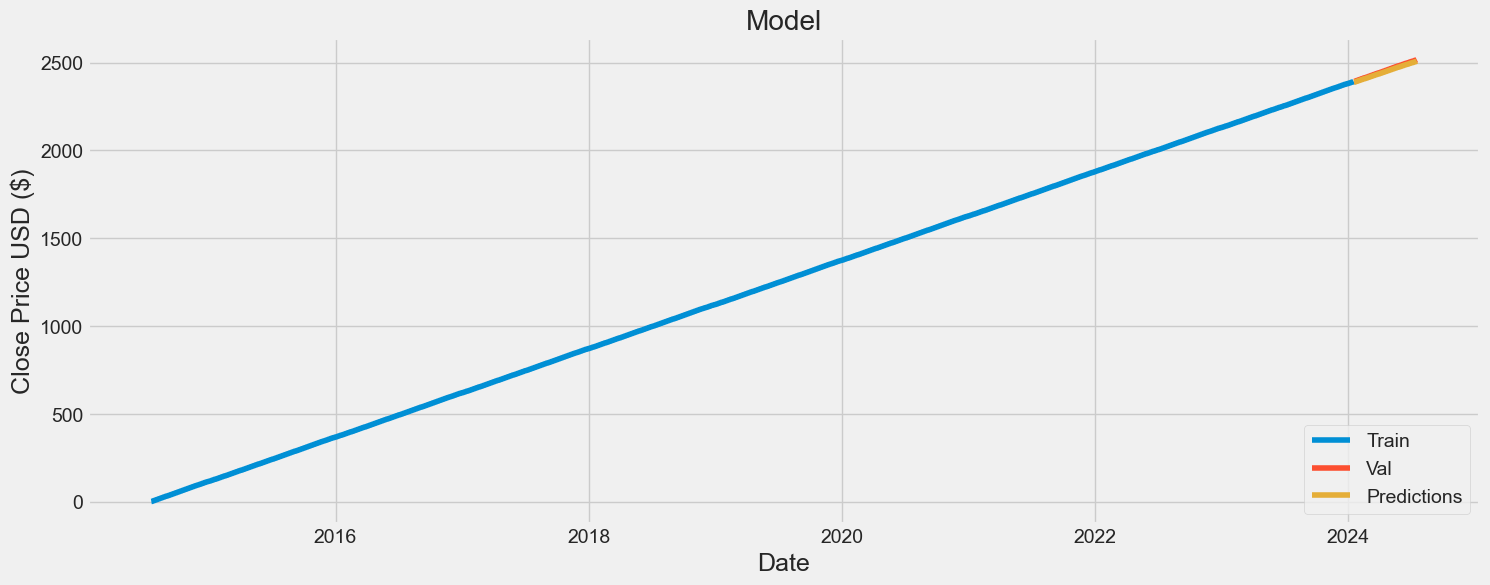

In [40]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()